# 2.4 Обучение, переобучение, недообучение и кросвалидация

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from graphviz  import Source
from IPython.display import SVG, display, HTML
style = "<style>svg{width: 70% !important; height: 60% !important;} </style>" 

## Мы собрали побольше данных о котиках и собачках, 

и готовы обучить нашего робота их классифицировать! Скачайте тренировочный датасэт 
https://stepik.org/media/attachments/course/4852/dogs_n_cats.csv
и  обучите на нём Decision Tree. После этого скачайте датасэт из задания и предскажите какие наблюдения к кому относятся. Введите число собачек в вашем датасэте.

В задании допускается определённая погрешность.

P. S.: данные в задании находятся в формате json, используйте метод pd.read_json для их прочтения

У вас есть неограниченное число попыток.
Время одной попытки: 5 mins

Прототип решения:
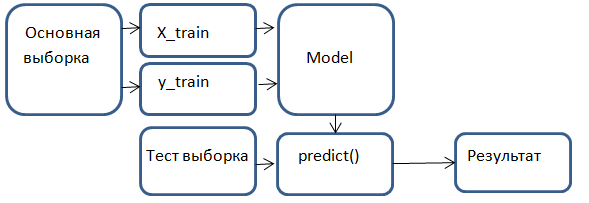


Николай Ульченко
3 года назад
Прототип решения:







1. Подключаем библиотеки

         from sklearn import tree

    import pandas as pd

    import numpy as nm

    import matplotlib.pyplot as plt

    import seaborn as sns

    from sklearn.model_selecion import train_test_split

 

2. Скачиваем выборку:

df_tr = pd.read_csv(r'..............')

    выводим наименование столбцов:

df_tr.columns

 

3. Обработка.

    Удаляем целевой столбец:

X = df_tr.drop(['Вид'], axis=1)

y = df_tr['Вид']

    Разбиваем выборку на тренировочную и тестовую:

X_train, X_test, y_train, y_test = train_test_split(..................)

4. Обучение.

clf = tree.DecisionTreeClassifier(...............')

clf.fit(........)

 

5. Определение количество собачек в тестовой выборке

    -скачиваем

df_ts = pd.read_json(r'.........')

    -проверяем соответствие столбцов тестовой и тренировочной выборки

df_ts[:2]

df_tr[:2]

    -если порядок не совпадает, то приводим к единому

     текущий порядок столбцов [b, c, d, a]     X_ts = df_ts[['a', 'b', 'c', 'd']]

 

result = clf.predict(X_ts)

pd.Series(result)[result == 'собачка'].count()

In [3]:
dogs_n_cats = pd.read_csv('dogs_n_cats.csv')

In [4]:
dogs_n_cats.head()

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям,Вид
0,15,18.0,1,1,0,собачка
1,20,24.0,1,0,0,собачка
2,34,40.8,1,1,0,собачка
3,26,31.2,1,1,0,собачка
4,16,19.2,1,1,0,собачка


In [5]:
dogs_n_cats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Длина               1000 non-null   int64  
 1   Высота              1000 non-null   float64
 2   Шерстист            1000 non-null   int64  
 3   Гавкает             1000 non-null   int64  
 4   Лазает по деревьям  1000 non-null   int64  
 5   Вид                 1000 non-null   object 
dtypes: float64(1), int64(4), object(1)
memory usage: 47.0+ KB


In [6]:
X = dogs_n_cats.drop(['Вид'], axis=1)
y = dogs_n_cats.Вид

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)

In [9]:
X_train.head()

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям
437,27,32.4,1,1,0
289,28,33.6,1,1,0
412,21,25.2,1,1,0
873,8,3.2,1,0,1
686,9,3.6,1,0,1


In [19]:
y_train

437    собачка
289    собачка
412    собачка
873      котик
686      котик
        ...   
554      котик
895      котик
342    собачка
279    собачка
628      котик
Name: Вид, Length: 670, dtype: object

In [24]:
max_depth_values = range(1,10)
scores_data = pd.DataFrame()

In [25]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()
    
    temp_score_data = pd.DataFrame({'max_depth': [max_depth],
                                    'train_score': [train_score],
                                    'test_score': [test_score],
                                   'cross_val_score':[mean_cross_val_score]})
    scores_data = scores_data.append(temp_score_data)

In [27]:
scores_data_long = pd.melt(scores_data, id_vars = ['max_depth'],
                           value_vars=['train_score','test_score','cross_val_score'], 
                           var_name='set_type', value_name ='score')

In [17]:
scores_data_long

,max_depth,set_type,score
0,1,train_score,1.0
1,2,train_score,1.0
2,3,train_score,1.0
3,4,train_score,1.0
4,5,train_score,1.0
...,...,...,...
292,95,cross_val_score,1.0
293,96,cross_val_score,1.0
294,97,cross_val_score,1.0
295,98,cross_val_score,1.0


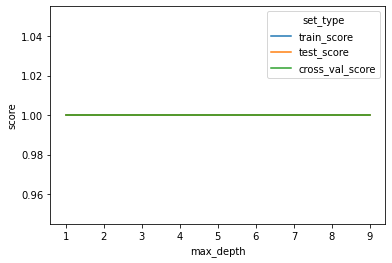

In [28]:
sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_data_long)

In [29]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

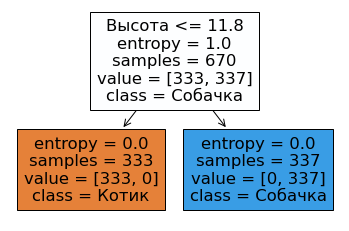

In [36]:
tree.plot_tree(clf, feature_names=list(X),
               class_names=['Котик', 'Собачка'],
               filled=True);

In [30]:
df_ts = pd.read_json(r'dataset_209691_15.txt')

In [32]:
X_train.head()

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям
437,27,32.4,1,1,0
289,28,33.6,1,1,0
412,21,25.2,1,1,0
873,8,3.2,1,0,1
686,9,3.6,1,0,1


In [31]:
df_ts.head()

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям
0,33,39.6,1,1,0
1,20,24.0,1,1,0
2,21,25.2,1,1,0
3,20,24.0,1,1,0
4,16,19.2,1,1,0


In [33]:
 X_ts = df_ts

In [34]:
result = clf.predict(X_ts)

pd.Series(result)[result == 'собачка'].count()

58

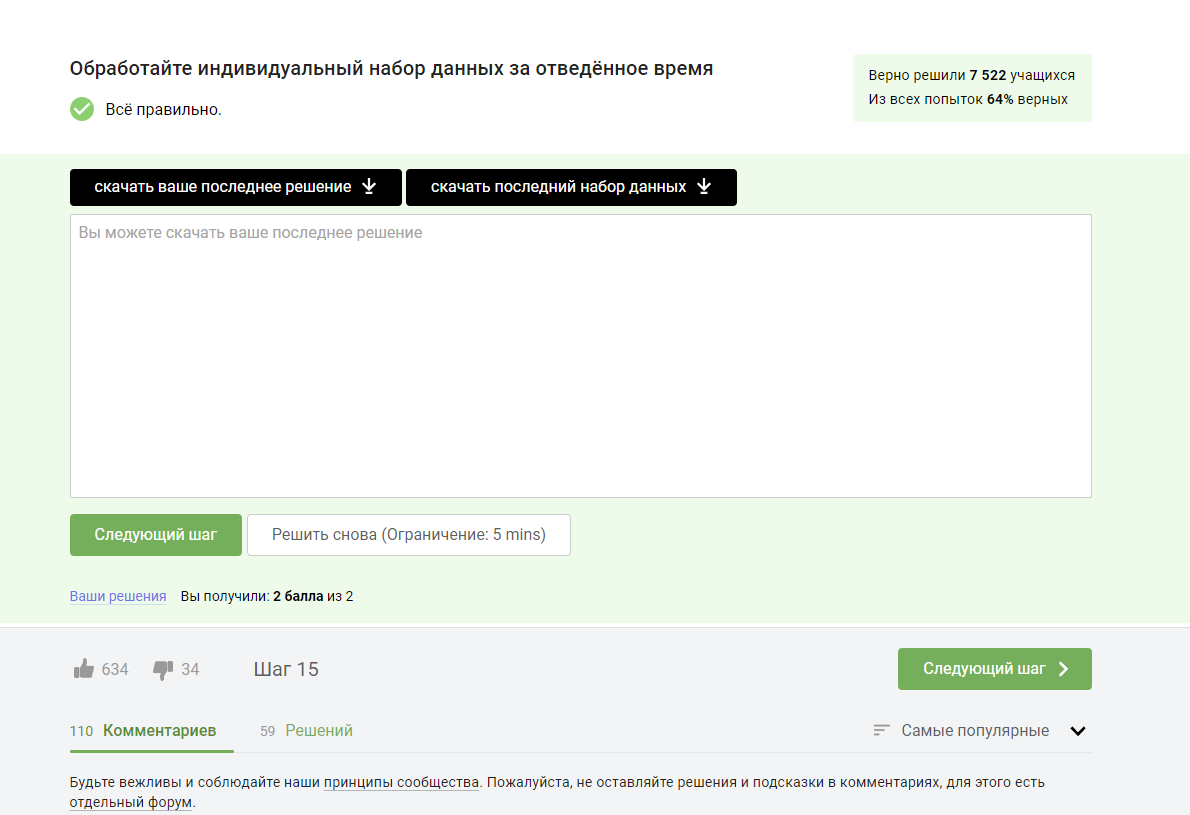

In [ ]:
# Считать данные для обучения Дерева
dogs_n_cats = pd.read_csv('/content/drive/My Drive/SampleData/dogs_n_cats.csv')
X_train = dogs_n_cats.drop('Вид', axis=1)
y_train = dogs_n_cats['Вид']

# Обучение Дерева
rs = np.random.seed(0)
clf = DecisionTreeClassifier(criterion='entropy', random_state=rs, max_depth=5)
clf.fit(X_train, y_train)

# Результат обучения
clf.score(X_train, y_train)

>>> 1.0


# Считать тестовые данные
X_test = pd.read_json('/content/drive/My Drive/SampleData/dataset_209691_15.txt')

# Предсказать результаты
y_pred = clf.predict(X_test)

# Подсчитать количество собачек
pd.Series(y_pred)[y_pred == 'собачка'].count()
>>> 59

In [37]:
X = df_gav.drop('Вид',axis = 1) 
y = df_gav['Вид'] 

 clf_gav = tree.DecisionTreeClassifier(criterion='entropy') 

clf_gav.fit(X,y) 

 predict_data = pd.read_json('stat_data/dataset_209691_15.txt')
 

y_predicted = clf_gav.predict(predict_data) 

pd.Series(y_predicted).value_counts()

IndentationError: unexpected indent (<ipython-input-37-a7c98c137ac9>, line 4)